<a href="https://colab.research.google.com/github/dcsweezy/Application-of-K-Means/blob/main/Lab3_SC5002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [12]:
#Input Dataset
X = np.array([
    [15,39],[16,81],[17,6],[18,77],[19,40],[20,76],[21,6],[22,94],[23,15],[24,73],
    [25,88],[26,17],[27,40],[28,55],[29,82],[30,20],[31,79],[32,35],[33,83],[34,30]
])
print(X)

[[15 39]
 [16 81]
 [17  6]
 [18 77]
 [19 40]
 [20 76]
 [21  6]
 [22 94]
 [23 15]
 [24 73]
 [25 88]
 [26 17]
 [27 40]
 [28 55]
 [29 82]
 [30 20]
 [31 79]
 [32 35]
 [33 83]
 [34 30]]


Firstly, import the libraries needed for numerical computation, visualization, and clustering.

1.  Numpy is used to store the dataset as a numerical array.
2.  Matplotlib handles plotting.
3.  KMeans from scikit-learn provides the clustering algorithm.

The dataset represents 20 customers with two features : annual income (in k$) and spending score.
Together, they describe consumer spending patterns. Printing X confirms that the data has been loaded correctly before performing any analysis.

# Task 1: Apply K-Means with k=3 and k=5

In [13]:
# Task 1: Apply K-Means with k=3 and k=5
# K-Means with k=3
kmeans3 = KMeans(n_clusters=3, random_state=0)
labels3 = kmeans3.fit_predict(X)

# K-Means with k=5
kmeans5 = KMeans(n_clusters=5, random_state=0)
labels5 = kmeans5.fit_predict(X)

Here, the K-Means algorithm is applied with two different numbers of clusters to see how cluster granularity changes.

The method fit_predict() both trains the model and assigns each point to its nearest centroid.

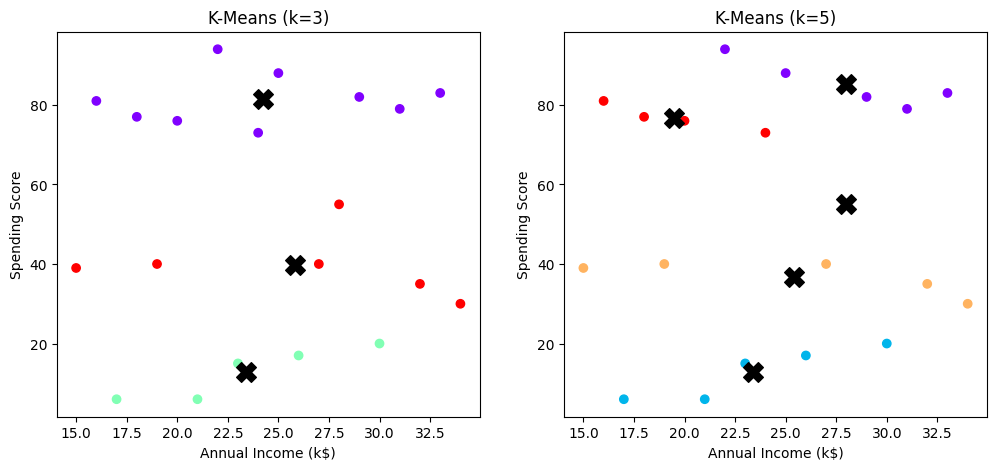

In [14]:
# Plot both results
fig, axs = plt.subplots(1, 2, figsize=(12,5))

axs[0].scatter(X[:,0], X[:,1], c=labels3, cmap='rainbow')
axs[0].scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s=200, c='black', marker='X')
axs[0].set_title('K-Means (k=3)')
axs[0].set_xlabel('Annual Income (k$)')
axs[0].set_ylabel('Spending Score')

axs[1].scatter(X[:,0], X[:,1], c=labels5, cmap='rainbow')
axs[1].scatter(kmeans5.cluster_centers_[:,0], kmeans5.cluster_centers_[:,1], s=200, c='black', marker='X')
axs[1].set_title('K-Means (k=5)')
axs[1].set_xlabel('Annual Income (k$)')
axs[1].set_ylabel('Spending Score')

plt.show()

The scatterplots display each cluster in a different color, while the black “X” marks demarcates the centroid positions.


---



When k = 3, the clusters are broader and capture general groupings such as low, medium, and high-spending customers. Increasing k to 5 produces smaller, more specific segments that separate customers with similar but slightly distinct behaviours.


K-Means iteratively assigns points to the nearest centroid and updates the centroids to be the mean of their assigned members until the positions stabilise. This process minimises variation within clusters and results in compact, well-separated groups.

# Task 2: Use Elbow Method

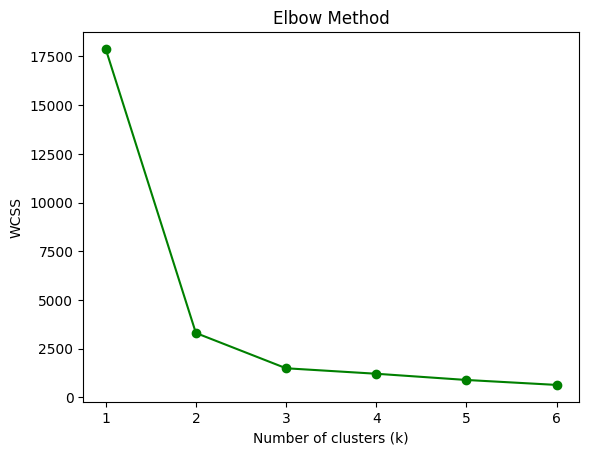

In [15]:
#Task 2: Use Elbow Method
wcss = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # WCSS (SSE)

plt.plot(range(1,7), wcss, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

Next, I apply the Elbow Method to determine a suitable number of clusters.
For each k value between 1 and 6, the model computes the within cluster sum of squares (WCSS), which measures how tightly the data points in a cluster are grouped around their centroid. Lower WCSS values indicate more compact clusters.

The plot shows that WCSS decreases quickly at first and then levels off. The point where the curve begins to flatten (the “elbow”) suggests the most efficient number of clusters. In this dataset, the elbow typically appears near k = 3, implying that adding more clusters beyond that yields diminishing improvement. *Therefore k=3 being the optimal number of clusters.*

# Task 3: Analyze Sensitivity to Initialization

In [16]:
for seed in [0, 5, 10]:
    kmeans = KMeans(n_clusters=3, random_state=seed)
    labels = kmeans.fit_predict(X)
    print(f"Random state {seed}, WCSS: {kmeans.inertia_:.2f}")

Random state 0, WCSS: 1495.44
Random state 5, WCSS: 1495.44
Random state 10, WCSS: 1495.44


Following WCSS, I tested how K-Means behaves when the initial centroid positions change. As centroids are chosen randomly at the start, different seeds can lead the algorithm to slightly different results or WCSS values.

This happens because K-Means can converge to different local minima depending on where centroids are initialised. To improve consistency, the algorithm is typically executed multiple times with different random initialisations, and the solution with the lowest overall WCSS is chosen as the final result.


In my case, running the model with seeds 0, 5, and 10 shows *no variations in WCSS*.  The results show, K-Means produced the same WCSS across random seeds. This indicates that the dataset has a **strong global minimum** and the clustering solution is **stable**, meaning initialization has little effect.
In contrast, for less separable or non-spherical data, WCSS can differ across seeds due to convergence to different local minima.


Demonstrating this variability highlights that K-Means is hihgly sensitive to starting conditions. It also shows why multiple restarts help produce more stable clustering results.

# Task 4: Visualising Clustering Limitations

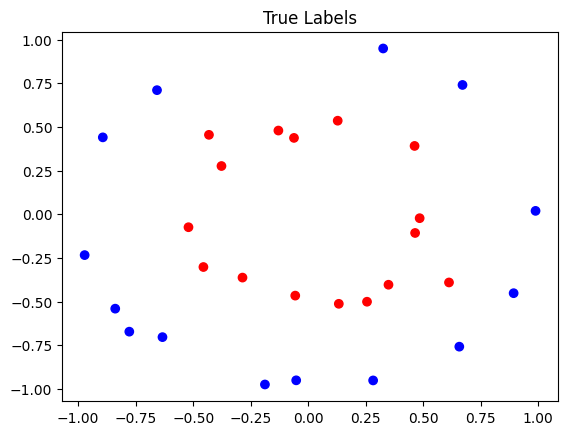

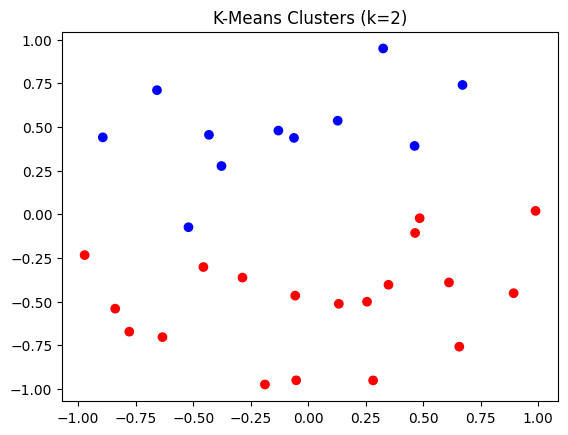

In [17]:
circle_data = np.array([
 [0.1331,-0.5126,1],[0.4648,-0.1070,1],[-0.5205,-0.0741,1],[0.4625,0.3913,1],
 [-0.9720,-0.2337,0],[-0.8390,-0.5404,0],[0.3491,-0.4034,1],[-0.4556,-0.3020,1],
 [0.2823,-0.9513,0],[0.9885,0.0195,0],[-0.0522,-0.9507,0],[-0.4315,0.4549,1],
 [0.1283,0.5358,1],[-0.0563,-0.4657,1],[0.4846,-0.0224,1],[-0.1881,-0.9745,0],
 [0.3259,0.9493,0],[-0.8930,0.4404,0],[-0.7778,-0.6721,0],[0.6570,-0.7580,0],
 [-0.0618,0.4373,1],[0.6709,0.7405,0],[-0.6336,-0.7034,0],[-0.2857,-0.3625,1],
 [-0.1296,0.4794,1],[0.2557,-0.5007,1],[-0.6574,0.7107,0],[0.8932,-0.4518,0],
 [-0.3771,0.2763,1],[0.6122,-0.3904,1]
])
X2, y_true = circle_data[:,:2], circle_data[:,2]

# True labels
plt.scatter(X2[:,0], X2[:,1], c=y_true, cmap='bwr')
plt.title('True Labels')
plt.show()

# K-Means result
kmeans = KMeans(n_clusters=2, random_state=0)
pred_labels = kmeans.fit_predict(X2)
plt.scatter(X2[:,0], X2[:,1], c=pred_labels, cmap='bwr')
plt.title('K-Means Clusters (k=2)')
plt.show()

Finally, I explore a scenario where K-Means performs poorly.

The dataset used contains two interlocking circular patterns representing two distinct classes.

*   The first plot shows the true labels predicted by K-Means.
*   the second plot shows the clusters predicted by K-Means.


---


Instead of identifying the two circular shapes, K-Means divides the data with a straight boundary. This happens because the algorithm relies on Euclidean distance and assumes that clusters are spherical, evenly sized, and convex. Under this assumption, the algorithm separates data using linear boundaries that minimize distance to centroids.

However, in complex or curved shapes like interlocking rings, these straight boundaries cut through clusters inaccurately, causing points from the same circular region to be misclassified.

This experiment highlights a ***fundamental limitation of K-Means***, it cannot capture non-linear or irregular cluster structures because the centroid-based approach is biased toward round, equally sized groups.
The **mean point (centroid) of a curved cluster** often lies **outside the actual cluster**, distorting assignments.


---

In contrast, algorithms such as DBSCAN or Spectral Clustering can handle these more complex cluster shapes effectively, as they group points based on density or graph connectivity rather than assuming spherical geometry.


# Conclusion
Through the application of K-Means clustering and supporting analyses such as the Elbow Method and initialization testing, this lab successfully meets the goal of identifying distinct customer groups for targeted marketing campaigns. By segmenting customers based on their annual income and spending score, meaningful patterns emerge that reflect varying purchasing behaviours and financial capacities. These insights allow a retail company to better understand its customer base, enabling more effective campaign strategies such as tailoring promotions, optimizing pricing, or designing loyalty programs for specific groups. Overall, this clustering approach provides a data-driven foundation for informed marketing decisions and improved customer engagement.